
# <center> **Liver Disease Prediction using Machine Learning** </center>

<center><img src="https://www.lalpathlabs.com/blog/wp-content/uploads/2020/01/Liver-Diseases.jpg" Height='500' Width='500'></center><br>


#### **Liver Disase Dataset**
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

# **Importing Packages**

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

# **Uploading Dataset**

In [3]:
# Reading Dataset:
dataset = pd.read_csv("/content/Liver_data.csv")
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Last 5 records:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


# **Data Preprocessing**

In [5]:
# Shape of dataset:
dataset.shape

(583, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## **Checking Missing Values**

In [7]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

- 'Albumin_and_Globulin_Ratio' feature contain 4 NaN values.

In [8]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(dataset['Albumin_and_Globulin_Ratio'].median())
print(dataset['Albumin_and_Globulin_Ratio'].mean())

0.93
0.9470639032815197


In [9]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [10]:
# Datatypes:
dataset.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

## **Description about Dataset**

In [11]:
# Description:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# **Exploratory Datas Analysis**

Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


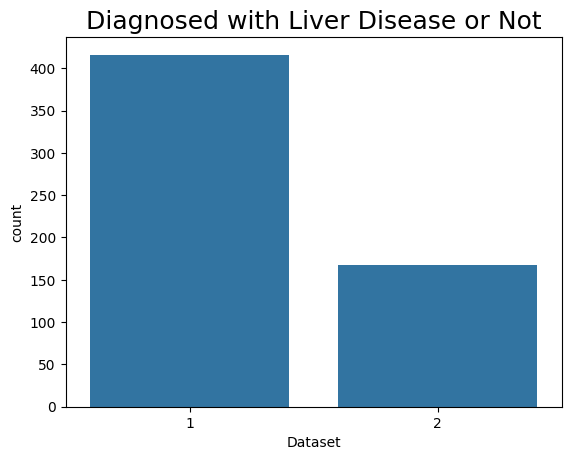

In [12]:
# Target feature:
print("Liver Disease Patients      :", dataset['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", dataset['Dataset'].value_counts()[2])

# Visualization:
ax = sns.countplot(data = dataset, x ='Dataset')
ax.set_title('Diagnosed with Liver Disease or Not', fontsize=18)
plt.show()

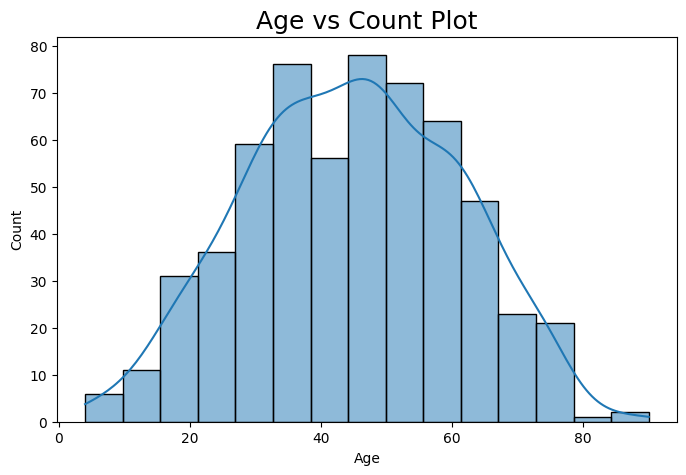

In [13]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(dataset['Age'], kde=True)
plt.title('Age vs Count Plot', fontsize=18)
plt.show()

In [14]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Total Male   : 441
Total Female : 142


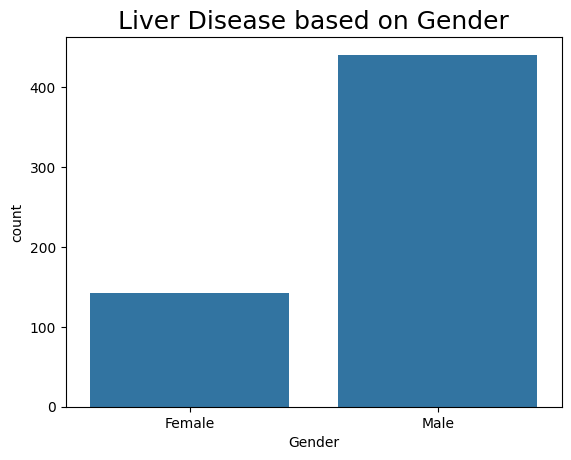

In [15]:
# Gender feature:
print("Total Male   :", dataset['Gender'].value_counts()[0])
print("Total Female :", dataset['Gender'].value_counts()[1])

# Visualization:
ax = sns.countplot(data = dataset, x ='Gender')
ax.set_title('Liver Disease based on Gender', fontsize=18)
plt.show()

In [16]:
# Printing How many Unique values present in each feature:
for feature in dataset.columns:
    print(feature,":", len(dataset[feature].unique()))

Age : 72
Gender : 2
Total_Bilirubin : 113
Direct_Bilirubin : 80
Alkaline_Phosphotase : 263
Alamine_Aminotransferase : 152
Aspartate_Aminotransferase : 177
Total_Protiens : 58
Albumin : 40
Albumin_and_Globulin_Ratio : 69
Dataset : 2


# **Feature Extraction**

In [17]:
# Label Encoding
dataset['Gender'] = np.where(dataset['Gender']=='Male', 1,0)

In [18]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


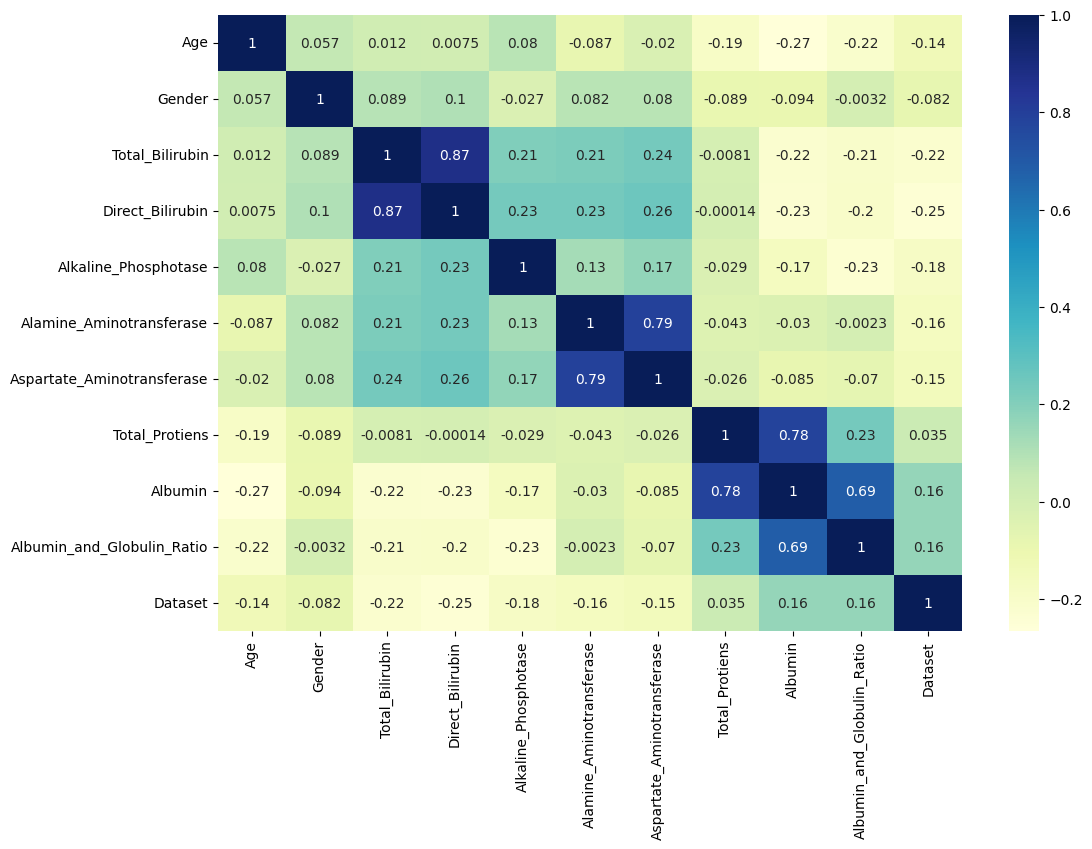

In [19]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### There is Multi-Collinearity found on our dataset.

In [20]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

1. Multicollinearity betwwen **'Total_Bilirubin'** and **'Direct_Bilirubin'** is **0.87%**
2. Multicollinearity betwwen **'Alamine_Aminotransferase'** and **'Aspartate_Aminotransferase' **is **0.79%**
3. Multicollinearity betwwen **'Total_Protiens'** and **'Albumin'** is **0.78%**
4. Multicollinearity betwwen **'Albumin'** and **'Albumin_and_Globulin_Ratio'** is **0.69%**

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature.
Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them
and other independent feature has less multicollinearity, less than 0.80% So we keep that feature.

In [21]:
# Droping 'Direct_Bilirubin' feature:
dataset = dataset.drop('Direct_Bilirubin', axis=1)

In [22]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<ipython-input-23-55135eb50980>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Albumin'])


<Axes: xlabel='Albumin', ylabel='Density'>

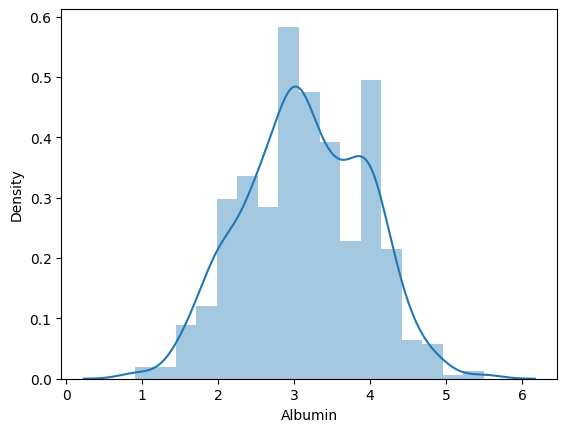

In [23]:
sns.distplot(dataset['Albumin'])

In [24]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=dataset['Total_Protiens'].mean() + 3* dataset['Total_Protiens'].std()
lower_boundary=dataset['Total_Protiens'].mean() - 3* dataset['Total_Protiens'].std()

print(dataset['Total_Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.483190394511149
3.2268359424407516
9.739544846581545


In [25]:
##### Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_boundary=dataset['Albumin'].mean() + 3* dataset['Albumin'].std()
lower_boundary=dataset['Albumin'].mean() - 3* dataset['Albumin'].std()

print(dataset['Albumin'].mean())
print(lower_boundary)
print(uppper_boundary)

3.141852487135506
0.7552960692434296
5.528408905027582


In [26]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = dataset.Total_Bilirubin.quantile(0.75)-dataset.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

-4.6000000000000005
8.0


In [27]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = dataset.Alkaline_Phosphotase.quantile(0.75) - dataset.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge

-192.0
665.5


In [28]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries:
IQR = dataset.Alamine_Aminotransferase.quantile(0.75) - dataset.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge

-89.5
173.0


In [29]:
# Lets compute the Interquantile range of Aspartate_Aminotransferase feature to calculate the boundaries:
IQR = dataset.Aspartate_Aminotransferase.quantile(0.75) - dataset.Aspartate_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Aspartate_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Aspartate_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Aspartate_Aminotransferase'] >= upper_bridge, 'Aspartate_Aminotransferase'] = upper_bridge

-161.0
273.0


In [30]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = dataset.Albumin_and_Globulin_Ratio.quantile(0.75) - dataset.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge

-0.5000000000000004
2.3000000000000007


In [31]:
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90,1
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74,1
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89,1
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00,1
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40,1


In [32]:
# Description after deal with outliers by IQR:
dataset.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,2.249400,266.389365,53.399657,73.041166,6.483190,3.141852,0.945403,1.286449
std,16.189833,0.429603,2.382344,145.665460,46.059536,73.549864,1.085451,0.795519,0.310942,0.452490
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,8.000000,665.500000,173.000000,273.000000,9.600000,5.500000,2.300000,2.000000


In [33]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [34]:
# top 5 records of Independent features:
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40


In [35]:
# top 5 records of dependent features:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [36]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [37]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({1: 416, 2: 167})
After SMOTE  :  Counter({1: 402, 2: 402})


# **Building the Machine Learning Model**

## **Splitting the Dataset**

In [38]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

In [39]:
print(X_train.shape)
print(X_test.shape)

(562, 9)
(242, 9)


In [40]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(9, 'Score')

,Features,Score
5,Aspartate_Aminotransferase,3368.743077
3,Alkaline_Phosphotase,2385.790640
4,Alamine_Aminotransferase,1717.348297
2,Total_Bilirubin,127.476411
0,Age,64.315174
7,Albumin,3.053371
8,Albumin_and_Globulin_Ratio,1.704602
1,Gender,0.964518
6,Total_Protiens,0.129627


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

## **1. Random Forest Classifier**

In [41]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8181818181818182
[[ 94  27]
 [ 17 104]]
              precision    recall  f1-score   support

           1       0.85      0.78      0.81       121
           2       0.79      0.86      0.83       121

    accuracy                           0.82       242
   macro avg       0.82      0.82      0.82       242
weighted avg       0.82      0.82      0.82       242



## **2. ADA Boost Classifier**

In [43]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.756198347107438
[[89 32]
 [27 94]]
              precision    recall  f1-score   support

           1       0.77      0.74      0.75       121
           2       0.75      0.78      0.76       121

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



## **3. Support Vector Machine (SVM)**

In [44]:
from sklearn.svm import SVC
from sklearn import metrics as met
svc = SVC(random_state=42)

In [45]:
svc.fit(X_train,y_train)

SVC(random_state=42)

In [46]:
svc_preds = svc.predict(X_test)  # Predicting the model

# Performance:
print('Accuracy:', accuracy_score(y_test,svc_preds))
print(confusion_matrix(y_test,svc_preds))
print(classification_report(y_test,svc_preds))

Accuracy: 0.7107438016528925
[[73 48]
 [22 99]]
              precision    recall  f1-score   support

           1       0.77      0.60      0.68       121
           2       0.67      0.82      0.74       121

    accuracy                           0.71       242
   macro avg       0.72      0.71      0.71       242
weighted avg       0.72      0.71      0.71       242



## **4. Neive Bayes Classifier (NB)**

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [48]:
gnb_preds = gnb.predict(X_test)
# Performance:
print('Accuracy:', accuracy_score(y_test,gnb_preds))
print(confusion_matrix(y_test,gnb_preds))
print(classification_report(y_test,gnb_preds))

Accuracy: 0.731404958677686
[[ 69  52]
 [ 13 108]]
              precision    recall  f1-score   support

           1       0.84      0.57      0.68       121
           2       0.68      0.89      0.77       121

    accuracy                           0.73       242
   macro avg       0.76      0.73      0.72       242
weighted avg       0.76      0.73      0.72       242



In [49]:
# Creating a pickle file for the classifier
import pickle
filename = 'Liver_Rf.pkl'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))

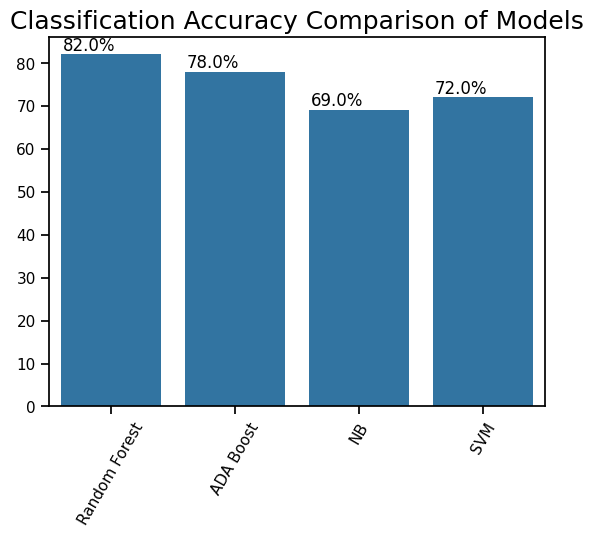

In [50]:
sns.set(context='notebook', style=None, palette='tab10')
models = ['Random Forest','ADA Boost','NB','SVM']
scores = [82, 78, 69, 72]
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(60)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

# **Prediction  of the Model**

##**Prediction_1**

In [55]:
input_data = (65, 0,	0.7,	187,	16, 18, 6.8,	3.3,	0.9)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = RandomForest.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
   print('The Person Having Liver Disease')
else:
   print('The Person does not have a Liver Disease')

[1]
The Person Having Liver Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##**Prediction_2**

In [61]:
input_data = (65, 0,	0.6,	183,	91, 53, 5.5,	2.3,	0.7)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = RandomForest.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
   print('The Person Having Liver Disease')
else:
   print('The Person does not have a Liver Disease')

[2]
The Person does not have a Liver Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
